<a href="https://colab.research.google.com/github/epistimi4/emotion_based_music_recomendation/blob/master/Preprocessing/Spotify_MusicInformationRetrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music Information Retrieval from Spotify #

# P3 - Emotion and context-aware recommendation system #

## Import libraries and install dependencies ##

In [1]:
!pip install spotipy

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [0]:
import numpy as np
import json
import pandas as pd
import IPython.display
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials #to access authorised Spotify data

### Preprocessing ###
#### Read datasets ####

In [6]:
import glob
dpath = 'C:\\usersCode\\MScDataScience\\Multimodal analysis\\Preprocessing\\user_data\\'

onlyfiles = glob.glob(dpath+'*.xlsx')
print(onlyfiles)

['C:\\usersCode\\MScDataScience\\Multimodal analysis\\Preprocessing\\user_data\\user_1.xlsx', 'C:\\usersCode\\MScDataScience\\Multimodal analysis\\Preprocessing\\user_data\\user_2.xlsx', 'C:\\usersCode\\MScDataScience\\Multimodal analysis\\Preprocessing\\user_data\\user_3.xlsx', 'C:\\usersCode\\MScDataScience\\Multimodal analysis\\Preprocessing\\user_data\\user_4.xlsx']


In [15]:
udata_prev = pd.DataFrame()
for f in onlyfiles:
  udata = pd.read_excel(f)
  final_data = pd.concat([udata_prev,udata], axis=0, ignore_index=True)
  udata_prev = final_data
  

#udata.rename(columns = {
#  'Χρονική σήμανση'  :'time',
#  'What is your age in years?':'age',
#  'Your Genre?': 'genre',
#  'Location (your location when listening to music)': 'location',
#  'Mood (your mood when listening to music)' : 'mood',
#  'Activity (your activity when listening to music)' : 'activity',
#  'Time of the day When?' : 'daytime',
#  'Song? (pls respect the format Song-Artist)' : 'song'}, inplace=True)
final_data[['song','artist']] = final_data['song-artist'].str.split('-',expand=True)
print(len(final_data))
final_data.head(32)

32


,datetime,age,gender,location,mood,activity,period,song-artist,Id,song,artist
0,2020-01-02 19:32:59.996,44,Female,Other,Pleased,Studying,Evening (6pm - 12am),My Angel-Stive Morgan,1,My Angel,Stive Morgan
1,2020-01-13 18:01:27.894,44,Female,Work,Pleased,Working,Evening (6pm - 12am),October & April-The Rasmus,1,October & April,The Rasmus
2,2020-01-13 18:03:01.480,44,Female,Work,Pleased,Working,Evening (6pm - 12am),One more time-R Armando Morabito,1,One more time,R Armando Morabito
3,2020-01-14 11:59:17.082,44,Female,Work,Relaxed,Studying,Morning (6am - 12pm),Let me love you - Harley Quinn & The Joker,1,Let me love you,Harley Quinn & The Joker
4,2020-01-14 11:59:55.963,44,Female,Work,Relaxed,Studying,Morning (6am - 12pm),Sign of the Times - Harry Styles,1,Sign of the Times,Harry Styles
5,2020-01-14 12:01:19.592,44,Female,Work,Relaxed,Studying,Morning (6am - 12pm),When I Look At You - Miley Cyrus,1,When I Look At You,Miley Cyrus
6,2020-01-14 12:03:16.751,44,Female,Work,Relaxed,Working,Afternoon (12pm - 6pm),Diamond Heart - Alan Walker,1,Diamond Heart,Alan Walker
7,2020-01-14 12:33:31.343,44,Female,Work,Relaxed,Working,Afternoon (12pm - 6pm),Come Along - Titiyo,1,Come Along,Titiyo
8,2020-01-14 13:01:00.602,44,Female,Work,Nervous,Working,Afternoon (12pm - 6pm),My Angel - Stive Morgan,1,My Angel,Stive Morgan
9,2020-01-18 22:04:28.773,44,Female,Home,Sad,Amusing,Evening (6pm - 12am),Trespass - Andy Moor feat. Sue McLaren,1,Trespass,Andy Moor feat. Sue McLaren


In [0]:
j!youtube-dl -x https://www.youtube.com/watch?v=S5S6s5dZXNM --audio-format wav
#--match-title 'My Angel-Stive Morgan' --default-search "ytsearch" --audio-format wav
# https://www.youtube.com/watch?v=_O61vY8de8U

[youtube] S5S6s5dZXNM: Downloading webpage
[youtube] S5S6s5dZXNM: Downloading video info webpage
[download] Destination: TRON Legacy - The Grid (Long Version)-S5S6s5dZXNM.webm

[download]   0.0% of 3.43MiB at 249.87KiB/s ETA 00:14
[download]   0.1% of 3.43MiB at 749.61KiB/s ETA 00:04
[download]   0.2% of 3.43MiB at  1.71MiB/s ETA 00:02 
[download]   0.4% of 3.43MiB at  3.66MiB/s ETA 00:00 
[download]   0.9% of 3.43MiB at  3.78MiB/s ETA 00:00 
[download]   1.8% of 3.43MiB at  1.92MiB/s ETA 00:01 
[download]   3.6% of 3.43MiB at  2.29MiB/s ETA 00:01 
[download]   7.3% of 3.43MiB at  2.30MiB/s ETA 00:01 
[download]  14.6% of 3.43MiB at  2.33MiB/s ETA 00:01 
[download]  29.2% of 3.43MiB at  2.97MiB/s ETA 00:00 
[download]  58.3% of 3.43MiB at  3.19MiB/s ETA 00:00 
[download] 100.0% of 3.43MiB at  3.70MiB/s ETA 00:00 
[download] 100% of 3.43MiB in 00:01                  
[ffmpeg] Destination: TRON Legacy - The Grid (Long Version)-S5S6s5dZXNM.wav
Deleting original file TRON Legacy - The Grid

### Authorization flows ###

#### deprecated using Spotipy library ####

In [0]:
#deprecated
#Temporary user authorization: Implicit Grant
auth_request = requests.get(
    'https://accounts.spotify.com/authorize?client_id=8038c4be0f8a4844982edce1b2282ebc&\
    redirect_uri=http:%2F%2Fexample.com%2Fcallback&scope=user-read-private%20user-read-email&response_type=token&state=123')

print(auth_request.content)
response_dict = json.loads(auth_request.text)

for i in response_dict:
    print("key: ", i, "val: ", response_dict[i])

In [0]:
access_token = '1bd8da3a234e4060a6801a432c0e877d'
artist_name = 'Nibana'

artist_info = requests.get(
    'https://api.spotify.com/v1/search',
    headers={ 'access_token': access_token },
    params={ 'q': artist_name, 'type': 'artist' })

print(artist_info)

### Using spotipy ###

#### Authorize app ####

In [0]:
client_id = '8038c4be0f8a4844982edce1b2282ebc'
client_secret = '1bd8da3a234e4060a6801a432c0e877d'

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) #spotify object to access API

### Extract metadata /audio features from a song ###

In [0]:
# extract audio features for each song
def audio_features(song_name, track_id, album_metadata) :    
    spotify_song = {}
  
    #for track in songs_found:
        #pull audio features per track
        
    features = sp.audio_features(track_id)
    spotify_song['id'] = features[0]['id']
    #Append to relevant key-value
    spotify_song['acousticness'] = features[0]['acousticness']
    spotify_song['danceability'] = features[0]['danceability']
    spotify_song['energy'] = features[0]['energy']
    spotify_song['instrumentalness'] = features[0]['instrumentalness']
    spotify_song['liveness'] = features[0]['liveness']
    spotify_song['loudness'] = features[0]['loudness']
    spotify_song['speechiness'] = features[0]['speechiness']
    spotify_song['tempo'] = features[0]['tempo']
    spotify_song['valence'] = features[0]['valence']
    #popularity is stored elsewhere
    pop = sp.track(track_id)#track['id'])
    spotify_song['popularity'] = pop['popularity']
    print(album_metadata)
    spotify_song['release_date'] = album_metadata['album']['release_date']
    spotify_song['artist_name'] = album_metadata['artists'][0]['name']    
    spotify_song['song_name'] = pop['name']
    
    #if spotify_song['song_name'].lower() == song_name.lower():
    #print(song_name, spotify_song['song_name'])
    #if not any(d['song_name'] == spotify_song['song_name'] for d in spotify_songs):
    #  spotify_songs.append(spotify_song)          

    return spotify_song

### Search spotify for the songs in my list ###

#### Specify user lists ####

In [0]:
artistName="Blackmore*"
trackName='Where are we going from here'
q = "{0} artist:{1}".format(trackName,artistName)
sp.search(q)

In [0]:
user_preferences = [{
                    'name':'playlist_1',                  
                    'event': 'working',
                    'location':'work',
                    'time_of_day':'morning,afternoon',
                    'mood': 'stressed',
                    'song_list':['Blue... The Color of Dreams artist:Yakuro', 
                                 'the grid artist:Daft Punk', 
                                 'Sirius 2017(Disco Remix) artist:The Alan Parsons Project ', 
                                 'Project L.O.V.E artist:Pryda', 
                                 'Tron Legacy - Son Of Flynn artist:Daft Punk', 
                                 'our eyes (sephira remix) artist:Nibana',
                                 'Lady in Black artist:Ken Hensley',
                                 'In a Manner of Speaking artist:Martin Gore', 
                                 "Where are we going from here artist:Blackmore*", 
                                 'All of this and nothing artist:david gahan',
                                 'Warrior artist:Paloma Faith',
                                 'Broken Glass artist:Sia']
}]
song_list = user_preferences[0]['song_list']

print('my playlist has {0} songs'.format(len(song_list)))

my playlist has 12 songs


In [0]:
song_list = final_data

In [23]:
songs_found = []

for i,row in song_list.iterrows():  #chosen track  
  song = row['song']+':'+row['artist']
  result = sp.search(song) #search query
  
  if len(result['tracks']['items'])>0:
    track_id = result['tracks']['items'][0]['id']
    #print(track_id, result['tracks']['items'][0],result['tracks']['items'][0] )
    #print(sp.audio_features([track_id]))
    songs_found.append(audio_features(song, track_id, result['tracks']['items'][0]))#result['tracks']['items']) )
  else:
    print('song {0} not found'.format(song))

print('added {0} tracks'.format(len(songs_found)))

datetime       2020-01-02 19:32:59.996000
age                                    44
gender                             Female
location                            Other
mood                              Pleased
activity                         Studying
period               Evening (6pm - 12am)
song-artist         My Angel-Stive Morgan
Id                                      1
song                             My Angel
artist                       Stive Morgan
Name: 0, dtype: object
{'album': {'album_type': 'album', 'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5gCBbAjdGfXKthsKauWaYo'}, 'href': 'https://api.spotify.com/v1/artists/5gCBbAjdGfXKthsKauWaYo', 'id': '5gCBbAjdGfXKthsKauWaYo', 'name': 'Stive Morgan', 'type': 'artist', 'uri': 'spotify:artist:5gCBbAjdGfXKthsKauWaYo'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/6YgTYDvw0YcQixcb4yS305'}, 'href': 'https://api.spotify.com/v1/artists/6YgTYDvw0YcQixcb4yS305', 'id': '6YgTYDvw0YcQixcb4yS305'

In [27]:
df = pd.io.json.json_normalize(songs_found)
#display(list(songs_found))
df.to_excel('athina_playlist_metadata.xlsx')
df.head(20)

,acousticness,artist_name,danceability,energy,id,instrumentalness,liveness,loudness,popularity,release_date,song_name,speechiness,tempo,valence
0,0.14300,Stive Morgan,0.5170,0.6710,6x4QOwELkBmymbbm3Q2gvz,0.392000,0.0974,-10.072,19,2019-04-25,My Angel (Piano Theme 2019),0.0279,188.021,0.8620
1,0.40700,The Rasmus,0.5440,0.4630,4khu91lkXFEebpfrUs3f81,0.000000,0.0748,-6.832,43,2009-11-09,October & April,0.0294,131.842,0.2820
2,0.69600,R Armando Morabito,0.5530,0.5280,7f7f1GcRnsa4EZ2VZ1ZcsV,0.001080,0.1040,-12.852,33,2014-12-23,One More Time (feat. Malukah & Tina Guo),0.0306,143.937,0.0952
3,0.02750,Harry Styles,0.5160,0.5950,5Ohxk2dO5COHF1krpoPigN,0.000000,0.1090,-4.630,78,2017-05-12,Sign of the Times,0.0313,119.972,0.2220
4,0.14200,Miley Cyrus,0.4590,0.5450,7ywzEdEuVG1lsjsRCGJfLy,0.000000,0.1050,-4.874,60,2009-01-01,When I Look At You,0.0282,137.941,0.1940
5,0.12300,Alan Walker,0.4780,0.6330,0nrWZWkJM62ftQJSI8fDc0,0.000000,0.4100,-6.190,67,2018-12-14,Diamond Heart,0.0345,89.909,0.2870
6,0.06410,Titiyo,0.6450,0.7870,7GmHOAdriOnI9s5S79GAUr,0.513000,0.3410,-4.707,54,2001-01-01,Come Along,0.0274,84.116,0.9060
7,0.14300,Stive Morgan,0.5170,0.6710,6x4QOwELkBmymbbm3Q2gvz,0.392000,0.0974,-10.072,19,2019-04-25,My Angel (Piano Theme 2019),0.0279,188.021,0.8620
8,0.06050,Ken Hensley,0.5430,0.6190,7LC2RIcKlE8TNUqT6JRogp,0.000146,0.0241,-7.689,28,2005-11-05,Lady in Black,0.0271,93.165,0.3620
9,0.00156,Flaer Smin,0.5540,0.5850,6ONjby7uiQ1kFQD3GS0z6u,0.874000,0.1140,-8.571,4,2019-05-30,Catharsis,0.0270,90.017,0.1020


### Audio Analysis ###

#### Download and Install pyAudioAnalysis ####

In [0]:
!git clone https://github.com/tyiannak/pyAudioAnalysis.git

In [0]:
#import eyeD3

#from google.colab import files
#src = list(files.upload().values())[0]
#open('eyeD3-0.8.7.tar','wb').write(src)
ppath = 'C:\\usersCode\\MScDataScience\\Multimodal analysis\\packages\\'
!pip install ppath + eyeD3-0.8.7.tar


Invalid requirement: '+'

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [0]:
#from google.colab import files
#src = list(files.upload().values())[0]
#open('pylab-0.0.2-py3-none-any.whl','wb').write(src)
!pip install ppath + pylab-0.0.2-py3-none-any.whl

Invalid requirement: '+'

You are using pip version 19.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [0]:
#!ls
!pip freeze > requirements.txt
!pip install -r requirements.txt
#!pip install eyeD3==0.7.11
!pip install -e pyAudioAnalysis

In [0]:
#from pyAudioAnalysis import ShortTermFeatures as ShortTermFeatures 
import scipy.io.wavfile as wavfile
from scipy.signal import medfilt as mf
import librosa 
import numpy as np
import plotly
import plotly.graph_objs as go
from google.colab import drive

drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/DataScience/Multimodal Analysis/data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


#### Pitch estimation ###

In [0]:
layout = go.Layout(title='Librosa pitch estimation', 
                     xaxis=dict(title='time frame',), 
                     yaxis=dict(title='freq (Hz)',)) 
   
def get_librosa_pitch(signal, fs, window): 
    pitches, magnitudes = librosa.piptrack(y=signal, sr=fs, n_fft=int(window), 
                                            hop_length=int(window/10)) 
    pitch_pos = np.argmax(magnitudes, axis=0) 
    pitches_final = [] 
    for i in range(len(pitch_pos)): 
        pitches_final.append(pitches[pitch_pos[i], i]) 
    pitches_final = np.array(pitches_final) 
    pitches_final[pitches_final > 2000] = 0  # cut high pitches 
    return mf(pitches_final, 3)              # use medfilt for smoothing 
   

s, fs = librosa.load(path+"/Yakuro - Blue... the colour of dreams.wav")
print(type(float(fs)), type(s))
p = get_librosa_pitch(s, float(fs), float(fs/20)) 
plt = go.Scatter(x=np.arange(len(p)), y=p, mode='markers', showlegend=False) 
plotly.offline.plot(go.Figure(data=[plt], layout=layout), 
                    filename=path+"pitch_track.html", auto_open=True)


<class 'float'> <class 'numpy.ndarray'>


'pitch_track.html'

In [0]:
plotly.offline.plot(go.Figure(data=[plt], layout=layout), 
                    filename=path+"pitch_track.html", auto_open=True)

'/content/gdrive/My Drive/DataScience/Multimodal Analysis/data/pitch_track.html'

#### Mel spectogram ####

In [0]:
layout = go.Layout(title='Melgram Extraction Example using librosa', 
                    xaxis=dict(title='time (sec)',), 
                    yaxis=dict(title='Mel Coefficient (index)',)) 
  
def normalize_signal(signal): 
  signal = np.double(signal) 
  signal = signal / (2.0 ** 15) 
  return (signal - signal.mean()) / ((np.abs(signal)).max() + 0.0000000001) 


[s, Fs] = librosa.load(path+"/Yakuro - Blue... the colour of dreams.wav")
s = normalize_signal(s) 
S = librosa.feature.melspectrogram(s, Fs, None, int(Fs * 0.020), 
                                    int(Fs * 0.020), power=2) 
# create frequency and time axes
print(S.shape[0]) 
f = [*range(S.shape[0])]
t = [float(t * int(Fs * 0.020)) / Fs for t in range(S.shape[1])] 
heatmap = go.Heatmap(z=S, y=f, x=t) 
plotly.offline.plot(go.Figure(data=[heatmap], layout=layout), 
                    filename=path+"mel_gram.html", auto_open=True)


128


'/content/gdrive/My Drive/DataScience/Multimodal Analysis/data/mel_gram.html'

### MFCCs coefficients ###

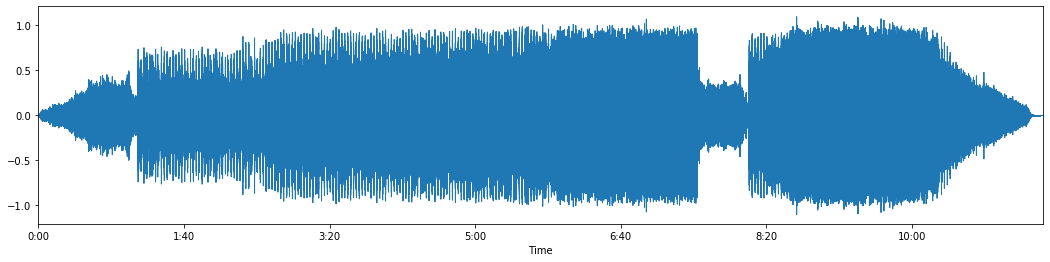

In [0]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18,4)

x, fs = librosa.load(path+"/Yakuro - Blue... the colour of dreams.wav")
librosa.display.waveplot(x, sr=fs)

In [0]:
IPython.display.Audio(x, rate=fs)

22050


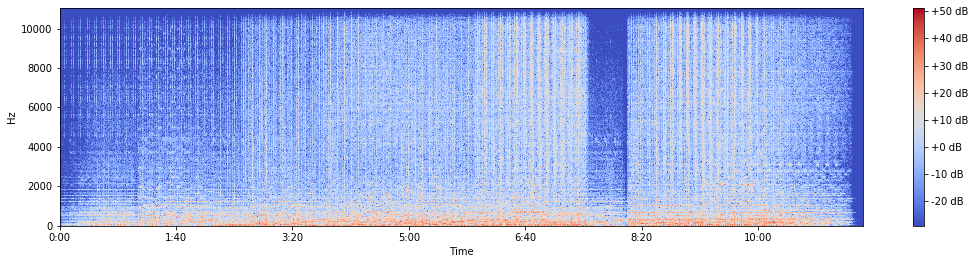

In [0]:
print(fs)
hop_length = 128
n_fft = 2048
X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
S = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(S, sr=fs, hop_length=hop_length, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')

In [0]:
print(fs)
mfccs = librosa.feature.mfcc(x, sr=fs)
print(mfccs.shape)
mfccs_mean = np.mean(mfccs, axis=1)
print(mfccs_mean.shape)

22050
(20, 29724)
(20,)


In [0]:
import sklearn

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

[-3.82474895e-17 -7.03753806e-16  3.05979916e-17  2.14185941e-16
  4.58969874e-17  1.37690962e-16 -1.52989958e-17  4.78093618e-17
 -3.44227405e-17  3.53789278e-17  8.79692258e-17  0.00000000e+00
  0.00000000e+00  2.86856171e-17  1.52989958e-17 -1.14742468e-17
 -2.29484937e-17  3.05979916e-17 -6.11959832e-17  4.58969874e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Text(0.5, 1.0, 'MFCC')

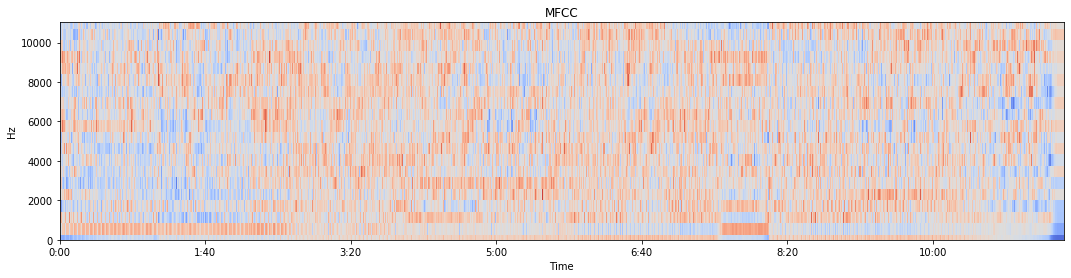

In [0]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time', y_axis='linear')
plt.title('MFCC')

### Loudness LUFS ###

In [0]:
!pip install git+https://github.com/csteinmetz1/pyloudnorm
!pip install essentia

  Cloning https://github.com/csteinmetz1/pyloudnorm to /tmp/pip-req-build-qt3lc0td
  Running command git clone -q https://github.com/csteinmetz1/pyloudnorm /tmp/pip-req-build-qt3lc0td
  Created wheel for pyloudnorm: filename=pyloudnorm-0.1.0-cp36-none-any.whl size=9408 sha256=6d976e00424beb7ab43973eefc8a57030e1ca36b8a864921312f73490ff1acd7
  Stored in directory: /tmp/pip-ephem-wheel-cache-ft4srbfl/wheels/76/34/54/970a004abbef1c6402d983e02bde8fdd0831d6cb259e45b157
Successfully built pyloudnorm
     |████████████████████████████████| 11.6MB 2.5MB/s 


In [0]:
import pyloudnorm as pyln

meter = pyln.Meter(fs) # create BS.1770 meter
loudness = meter.integrated_loudness(x) # measure loudness
print(loudness.shape)

()


In [0]:
import essentia
import essentia.standard as es

# Compute all features, aggregate only 'mean' and 'stdev' statistics for all low-level, rhythm and tonal frame features
features, features_frames = es.MusicExtractor(lowlevelStats=['mean', 'stdev'],
                                              rhythmStats=['mean', 'stdev'],
                                              tonalStats=['mean', 'stdev'])(path+"/Yakuro - Blue... the colour of dreams.wav")

# See all feature names in the pool in a sorted order
print(sorted(features.descriptorNames()))


['lowlevel.average_loudness', 'lowlevel.barkbands.mean', 'lowlevel.barkbands.stdev', 'lowlevel.barkbands_crest.mean', 'lowlevel.barkbands_crest.stdev', 'lowlevel.barkbands_flatness_db.mean', 'lowlevel.barkbands_flatness_db.stdev', 'lowlevel.barkbands_kurtosis.mean', 'lowlevel.barkbands_kurtosis.stdev', 'lowlevel.barkbands_skewness.mean', 'lowlevel.barkbands_skewness.stdev', 'lowlevel.barkbands_spread.mean', 'lowlevel.barkbands_spread.stdev', 'lowlevel.dissonance.mean', 'lowlevel.dissonance.stdev', 'lowlevel.dynamic_complexity', 'lowlevel.erbbands.mean', 'lowlevel.erbbands.stdev', 'lowlevel.erbbands_crest.mean', 'lowlevel.erbbands_crest.stdev', 'lowlevel.erbbands_flatness_db.mean', 'lowlevel.erbbands_flatness_db.stdev', 'lowlevel.erbbands_kurtosis.mean', 'lowlevel.erbbands_kurtosis.stdev', 'lowlevel.erbbands_skewness.mean', 'lowlevel.erbbands_skewness.stdev', 'lowlevel.erbbands_spread.mean', 'lowlevel.erbbands_spread.stdev', 'lowlevel.gfcc.cov', 'lowlevel.gfcc.icov', 'lowlevel.gfcc.mean

In [0]:
print("Filename:", features['metadata.tags.file_name'])
print("-"*80)
print("Replay gain:", features['metadata.audio_properties.replay_gain'])
print("EBU128 integrated loudness:", features['lowlevel.loudness_ebu128.integrated'])
print("EBU128 loudness range:", features['lowlevel.loudness_ebu128.loudness_range'])
print("-"*80)
print("MFCC mean:", features['lowlevel.mfcc.mean'])
print("-"*80)
print("BPM:", features['rhythm.bpm'])
print("Beat positions (sec.)", features['rhythm.beats_position'])
print("-"*80)
print("Key/scale estimation (using a profile specifically suited for electronic music):",
      features['tonal.key_edma.key'], features['tonal.key_edma.scale'])

Filename: Yakuro - Blue... the colour of dreams.wav
--------------------------------------------------------------------------------
Replay gain: -10.938497543334961
EBU128 integrated loudness: -10.57204818725586
EBU128 loudness range: 8.754629135131836
--------------------------------------------------------------------------------
MFCC mean: [-6.6103705e+02  1.3373117e+02  3.9206322e+01  1.3577487e+01
 -3.2981591e+00  6.0399103e+00 -5.4234874e-01  1.7691131e+00
 -1.4870511e+00 -9.2315263e-01 -1.3354270e+00 -6.9834787e-01
 -3.2669041e-01]
--------------------------------------------------------------------------------
BPM: 119.98914337158203
Beat positions (sec.) [5.1083899e-01 1.0332880e+00 1.5673469e+00 ... 6.8864581e+02 6.8908698e+02
 6.8952814e+02]
--------------------------------------------------------------------------------
Key/scale estimation (using a profile specifically suited for electronic music): Eb minor


### Zero-crossing rate ###

(1, 29724)


Text(0.5, 1.0, 'ZCR')

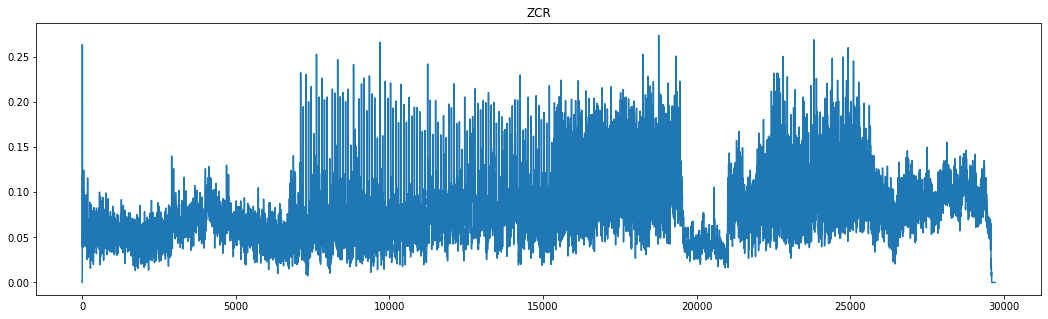

In [0]:
zcrs = librosa.feature.zero_crossing_rate(x + 0.0001)
print(zcrs.shape)
plt.figure(figsize=(18, 5))
plt.plot(zcrs[0])
plt.title('ZCR')

### Calculate energy ###

(1, 59448)
(59448,)
(1, 59448)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning:

Casting complex values to real discards the imaginary part



Text(0.5, 1.0, 'Energy - RMSE')

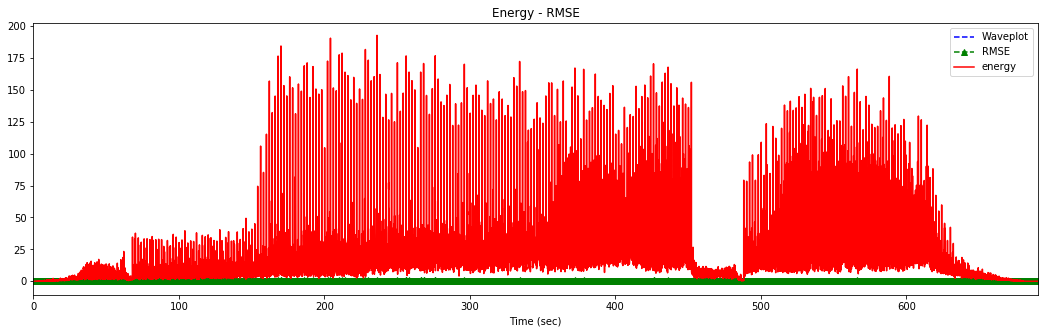

In [0]:
hop_length = 256
frame_length = 512
n_fft = 1

rmse = librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length, center=True)
print(rmse.shape)
rmse = rmse[0]

energy = np.array([
    sum(abs(x[i:i+frame_length]**2))
    for i in range(0, len(x), hop_length)
])
print(energy.shape)

frames = range(len(energy))
t = librosa.frames_to_time(frames, sr=fs, hop_length=hop_length)

X = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
print(X.shape)
X=X[0]
plt.figure(figsize=(18, 5))
#librosa.display.waveplot(x, sr=fs)
plt.plot(t, X, 'b--', t, rmse, 'g--^', t, energy, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')
plt.legend(('Waveplot', 'RMSE', 'energy')) 
plt.title('Energy - RMSE')

### Spectral centroid ###

(1, 29724)


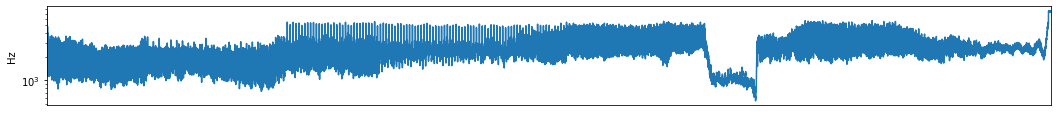

In [0]:
cent = librosa.feature.spectral_centroid(y=x, sr=fs)
plt.figure()
plt.subplot(2, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
print(cent.shape)